In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_csv(r"C:\Users\Minfy.DESKTOP-81ME0ME\Downloads\dataset loan.csv")

# Strip leading/trailing spaces from column names (important!)
df.columns = df.columns.str.strip()

# View shape and first 5 rows
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Basic info
print("\nData types and null values:")
print(df.info())


Shape of dataset: (5000, 14)

First 5 rows:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

Data types and null values:
<class 'pandas.core.

In [3]:
# Summary of numerical features
df.describe()

# Check for missing values
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

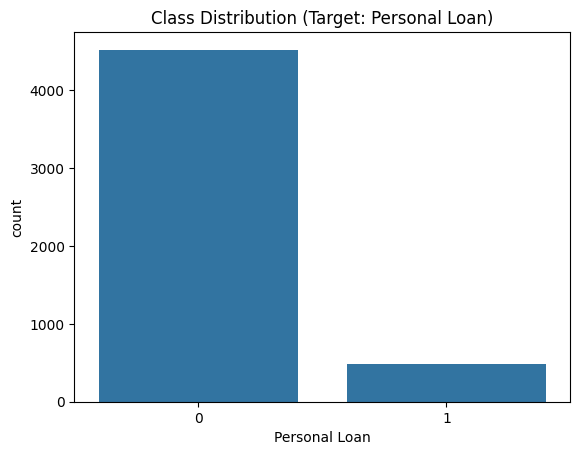

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='Personal Loan', data=df)
plt.title("Class Distribution (Target: Personal Loan)")
plt.show()

# Value counts
df['Personal Loan'].value_counts(normalize=True)


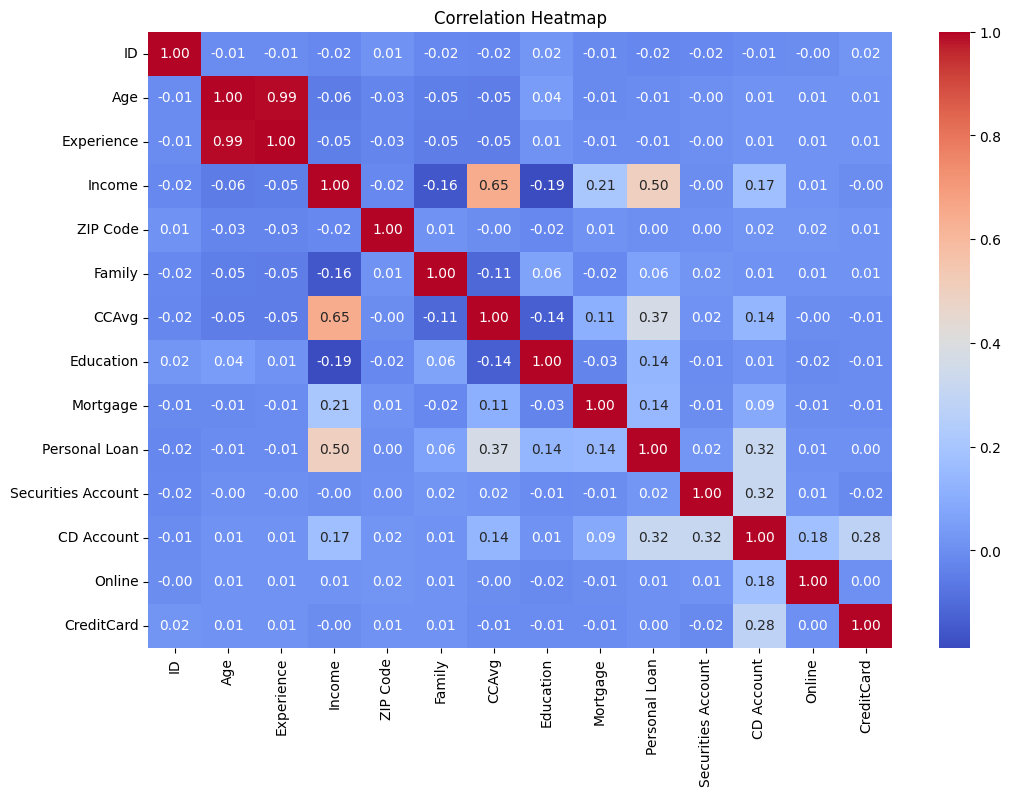

In [5]:
# Correlation with target
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


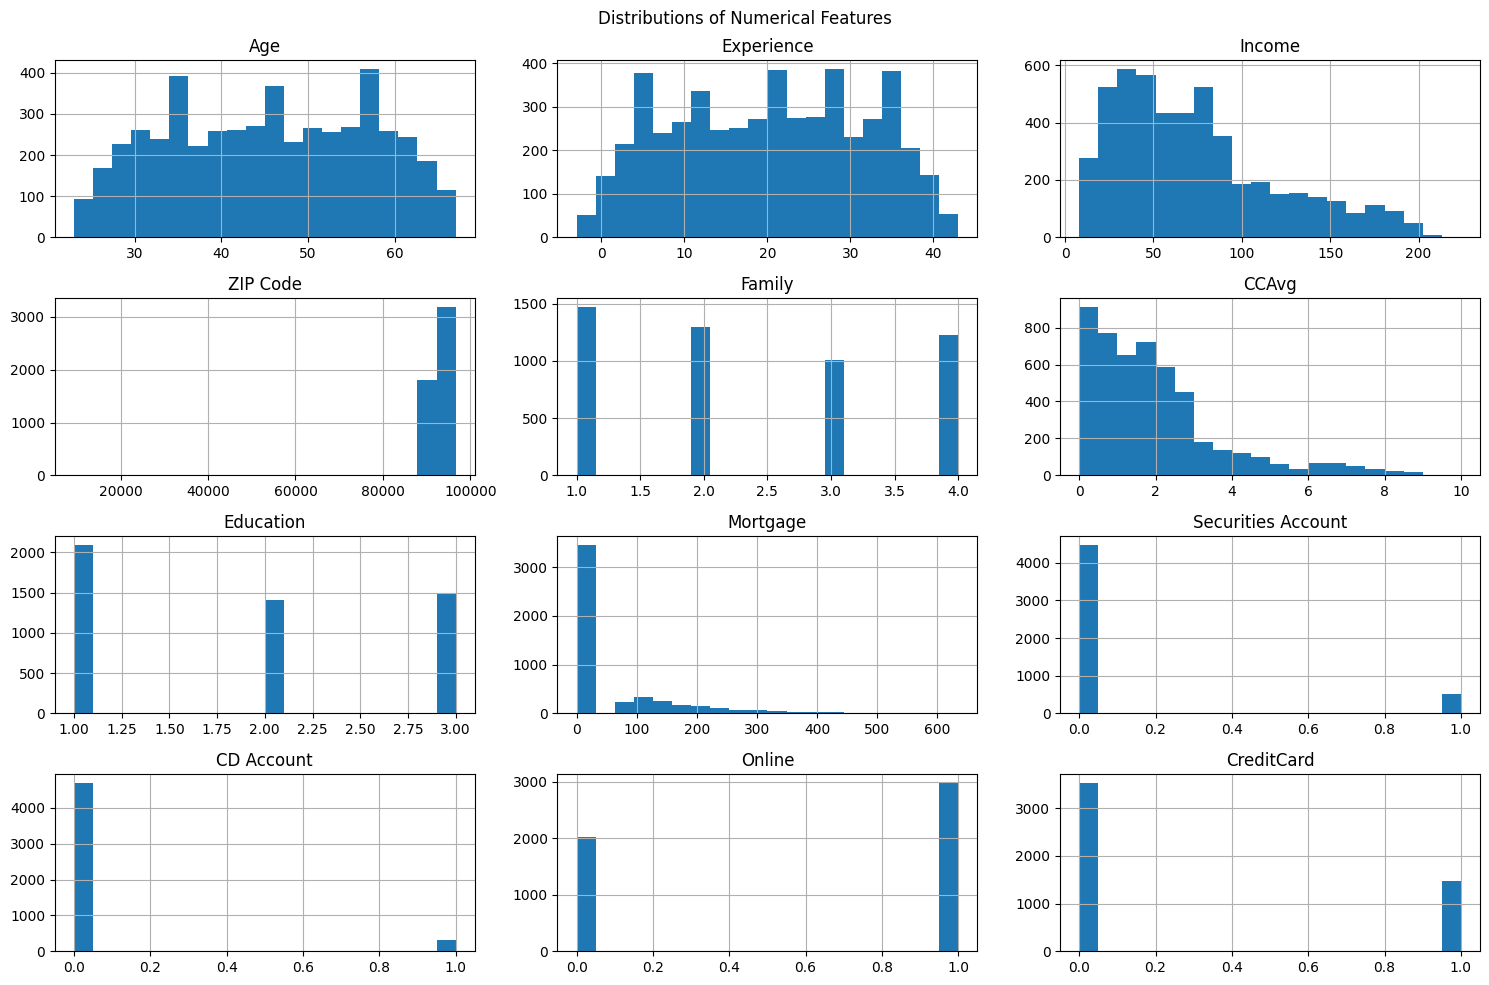

In [6]:
# Select numerical columns (excluding ID and target)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'Personal Loan'])

# Plot distributions
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()


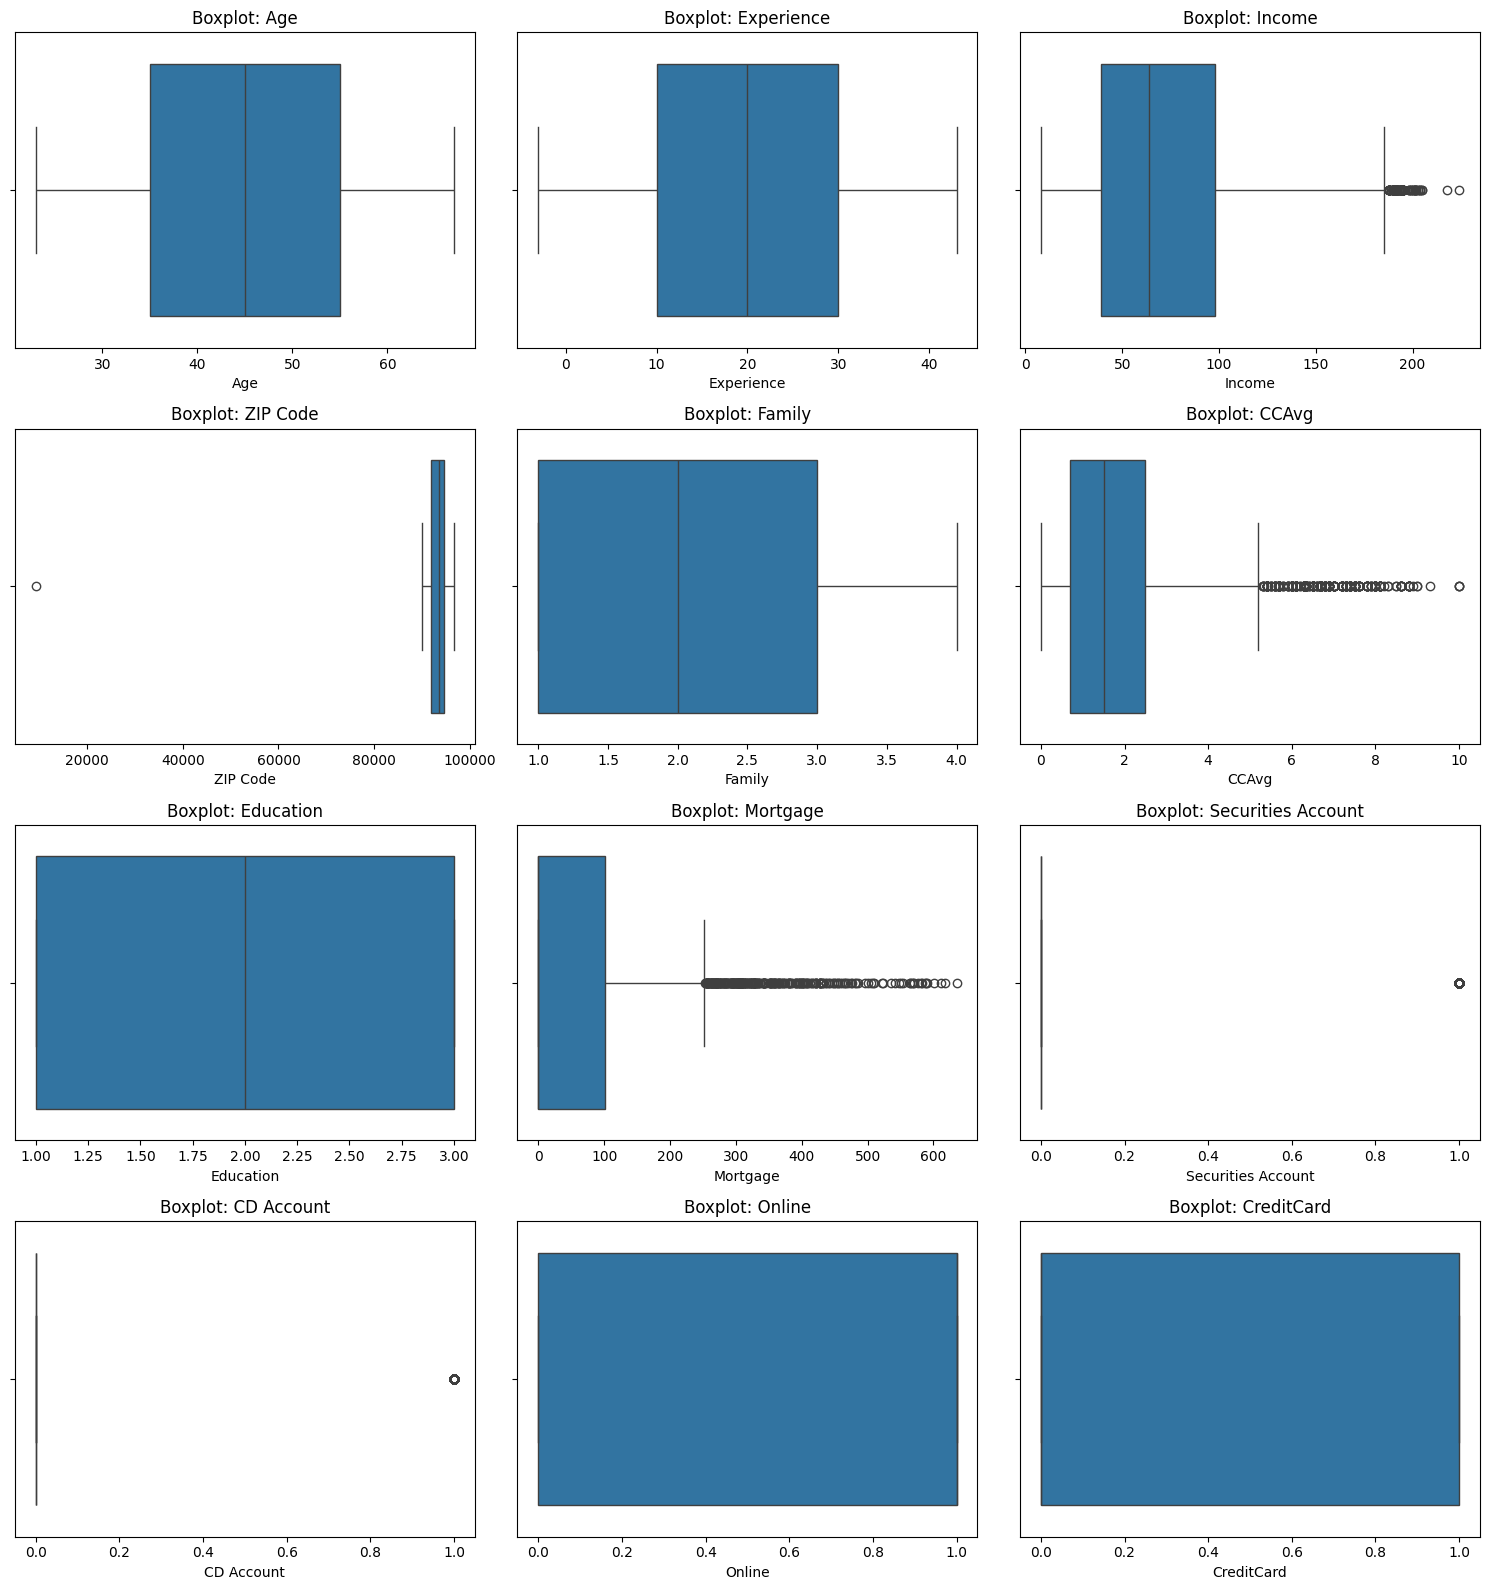

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# List of numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'Personal Loan'])

# Plot boxplots dynamically
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

In [8]:
# Check unique values of object (categorical) columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


In [9]:
# Get numerical columns (excluding ID if present)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('ID', errors='ignore')

# Compute range (min and max) for each
for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}, Range = {max_val - min_val}")


Age: Min = 23, Max = 67, Range = 44
Experience: Min = -3, Max = 43, Range = 46
Income: Min = 8, Max = 224, Range = 216
ZIP Code: Min = 9307, Max = 96651, Range = 87344
Family: Min = 1, Max = 4, Range = 3
CCAvg: Min = 0.0, Max = 10.0, Range = 10.0
Education: Min = 1, Max = 3, Range = 2
Mortgage: Min = 0, Max = 635, Range = 635
Personal Loan: Min = 0, Max = 1, Range = 1
Securities Account: Min = 0, Max = 1, Range = 1
CD Account: Min = 0, Max = 1, Range = 1
Online: Min = 0, Max = 1, Range = 1
CreditCard: Min = 0, Max = 1, Range = 1


In [10]:
# Show unique values in each column
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n{col} ({df[col].dtype}):")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")



ID (int64):
Unique values (5000): [   1    2    3 ... 4998 4999 5000]

Age (int64):
Unique values (45): [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Experience (int64):
Unique values (47): [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Income (int64):
Unique values (162): [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 18

## preprocessing 

In [11]:
# Strip column names (to avoid issues with spaces)
df.columns = df.columns.str.strip()

# Drop 'ID' and 'ZIP Code' if they exist
df.drop(columns=['ID', 'ZIP Code'], inplace=True, errors='ignore')

# Confirm the shape and columns
print("Shape after dropping:", df.shape)
print("Remaining columns:", df.columns.tolist())


Shape after dropping: (5000, 12)
Remaining columns: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [12]:
df = df[df['Experience'] >= 0]


In [13]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


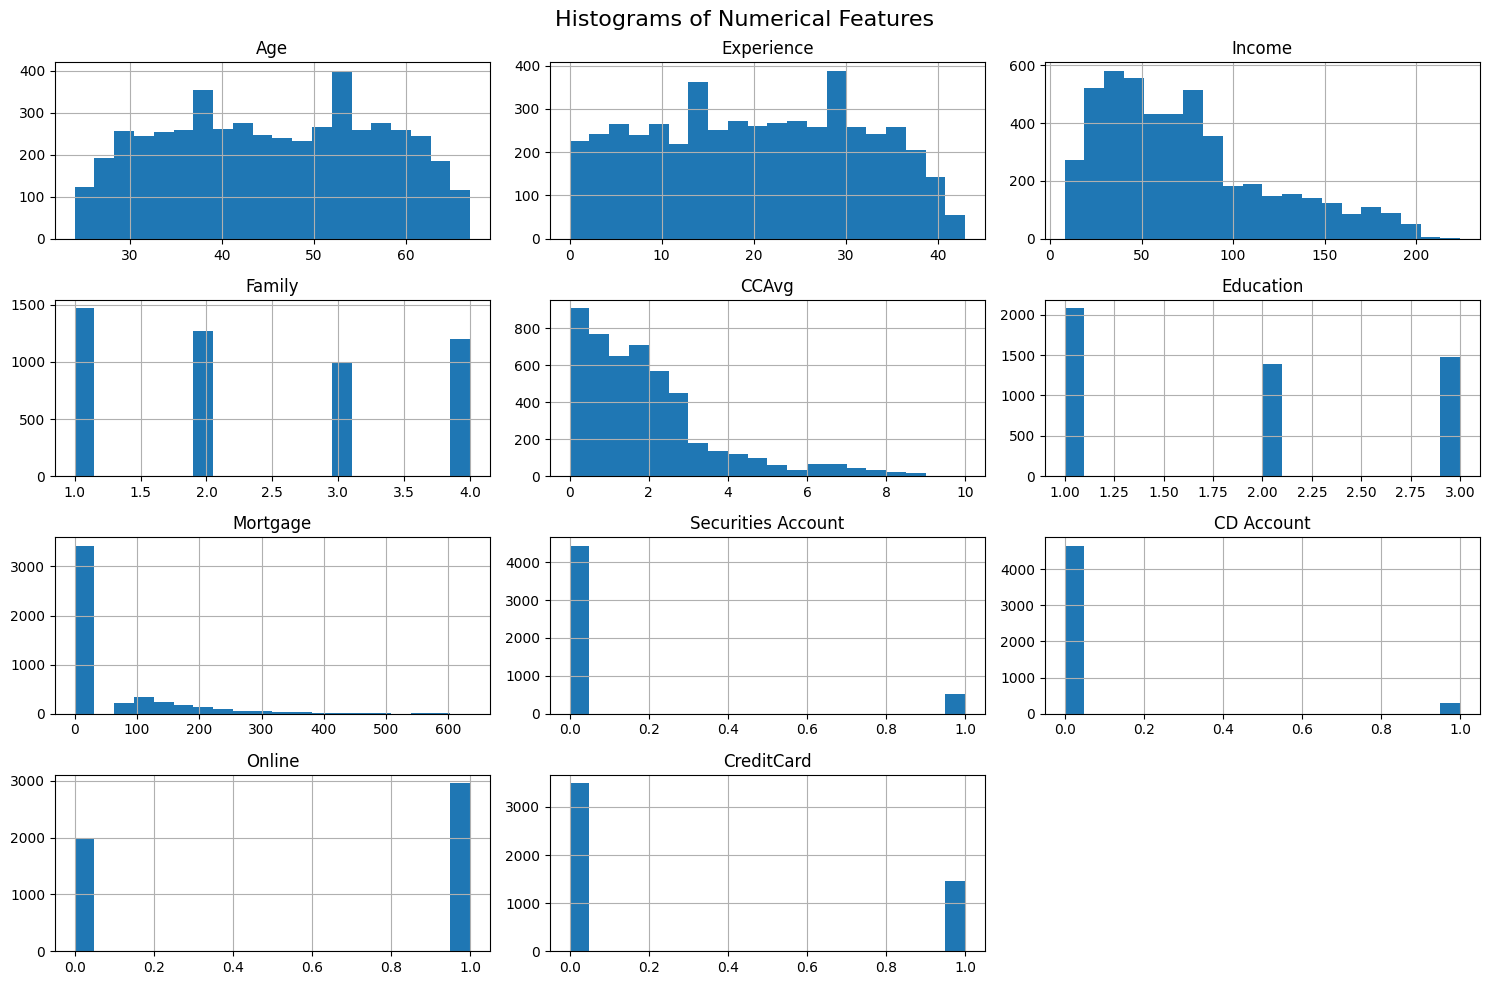

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns (after dropping ID and ZIP, and removing neg Experience)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Personal Loan')

# Histograms
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()



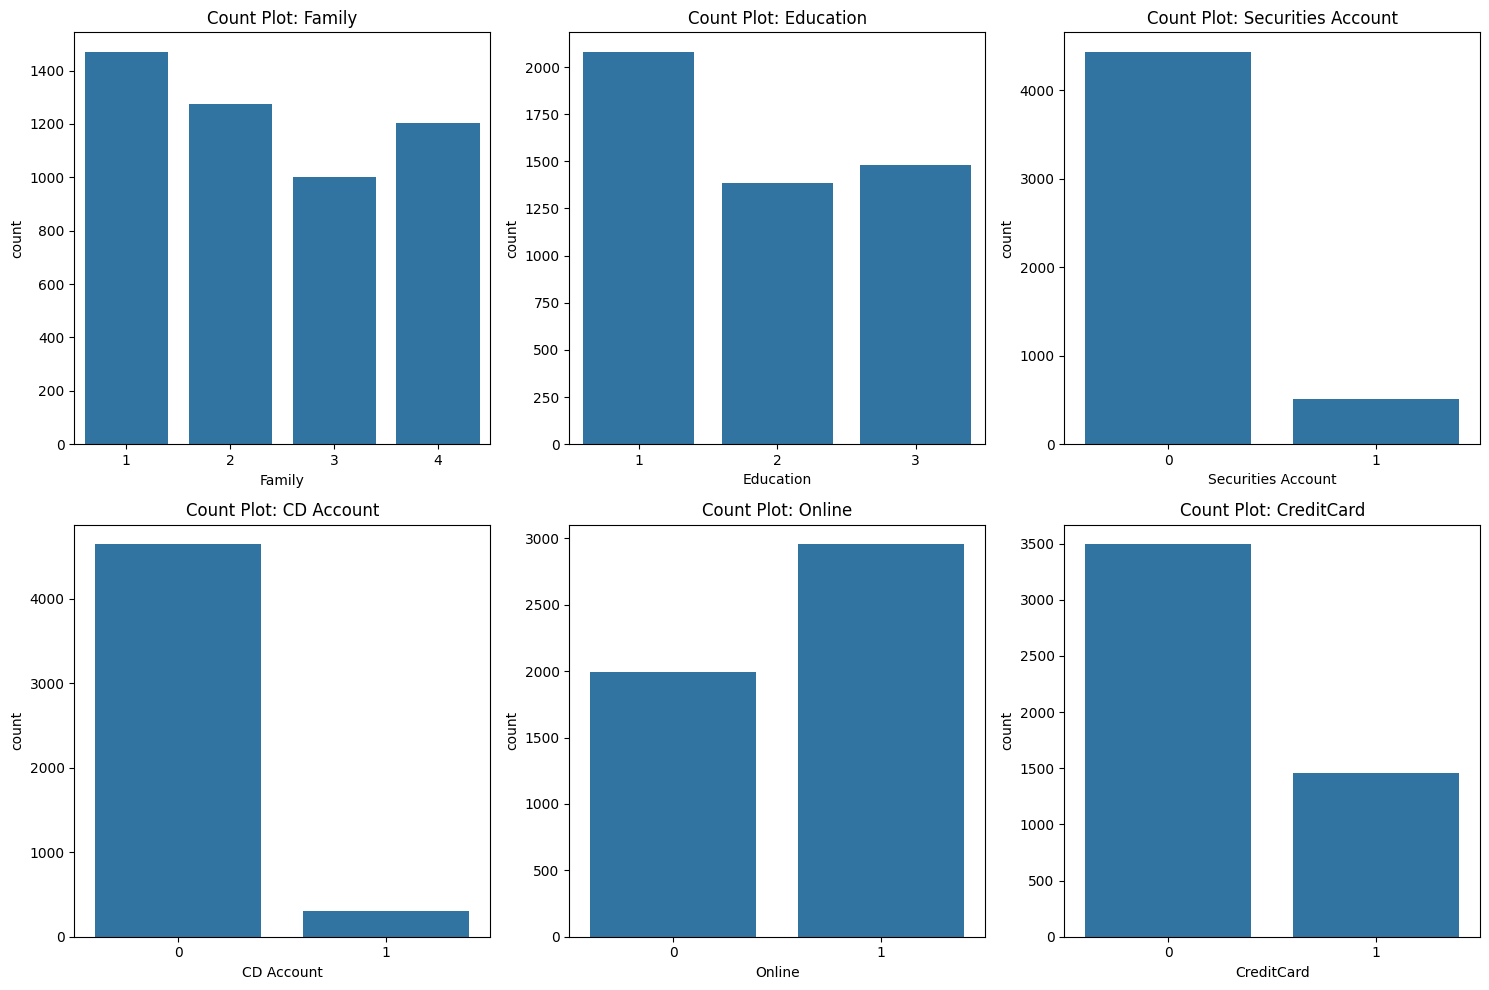

In [15]:
# Binary & categorical features
binary_cols = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Count plots for categorical/binary columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot: {col}')
plt.tight_layout()
plt.show()


In [16]:
# Select numeric columns (excluding target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Personal Loan', errors='ignore')

# Calculate skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)

# Display skewness values
print("Skewness of Numerical Features:\n")
print(skewness)

# Optional: highlight highly skewed features
print("\nHighly skewed features (|skewness| > 1):")
print(skewness[abs(skewness) > 1])


Skewness of Numerical Features:

CD Account            3.668415
Securities Account    2.590297
Mortgage              2.104585
CCAvg                 1.594624
CreditCard            0.904284
Income                0.842004
Education             0.231099
Family                0.159599
Experience           -0.014940
Age                  -0.022462
Online               -0.395672
dtype: float64

Highly skewed features (|skewness| > 1):
CD Account            3.668415
Securities Account    2.590297
Mortgage              2.104585
CCAvg                 1.594624
dtype: float64


In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1. Prepare data
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

# 2. Optional: One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# 3. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Apply SMOTE to training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 6. Define base classifiers
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 7. Voting Classifier (Soft Voting preferred for probability-based model)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # use 'hard' if you want majority class votes
)

# 8. Train and evaluate
voting_clf.fit(X_train_res, y_train_res)
y_pred = voting_clf.predict(X_test)

# 9. Results
print("✅ Classification Report (Voting Classifier):\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")


✅ Classification Report (Voting Classifier):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.93      0.93      0.93        87

    accuracy                           0.99       990
   macro avg       0.96      0.96      0.96       990
weighted avg       0.99      0.99      0.99       990

✅ Accuracy: 0.9879


c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


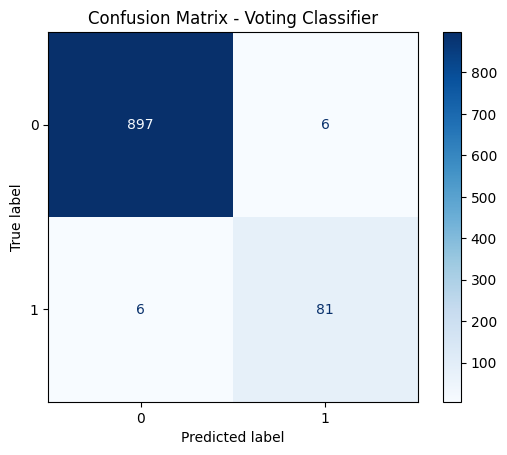

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()


c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xg

✅ Cross-validated F1-scores: [0.9822317  0.99300699 0.99441341 0.99719101 0.99650594]
✅ Average F1-score: 0.9927


c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📋 Classification Report (Tuned Voting Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.91      0.92      0.91        87

    accuracy                           0.98       990
   macro avg       0.95      0.96      0.95       990
weighted avg       0.98      0.98      0.98       990

✅ Accuracy: 0.9848


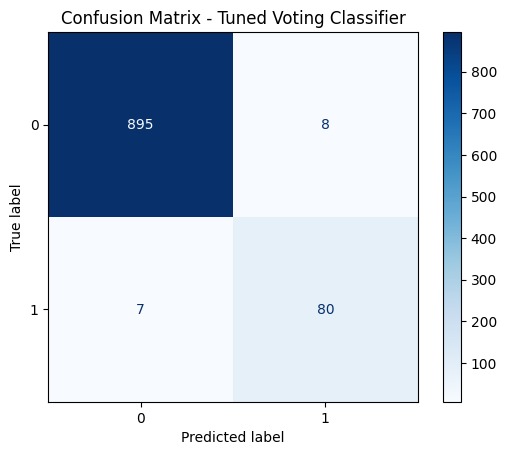

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# --- 1. Grid Search for Logistic Regression ---
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}
log_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, cv=5, scoring='f1')
log_grid.fit(X_train_res, y_train_res)
log_best = log_grid.best_estimator_

# --- 2. Grid Search for Random Forest ---
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train_res, y_train_res)
rf_best = rf_grid.best_estimator_

# --- 3. Grid Search for XGBoost ---
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid, cv=5, scoring='f1')
xgb_grid.fit(X_train_res, y_train_res)
xgb_best = xgb_grid.best_estimator_

# --- 4. Voting Classifier with Tuned Models ---
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_best),
        ('rf', rf_best),
        ('xgb', xgb_best)
    ],
    voting='soft'
)

# --- 5. Cross-validation on Voting Classifier ---
cv_scores = cross_val_score(voting_clf, X_train_res, y_train_res, cv=5, scoring='f1')
print(f"✅ Cross-validated F1-scores: {cv_scores}")
print(f"✅ Average F1-score: {np.mean(cv_scores):.4f}")

# --- 6. Final training and evaluation ---
voting_clf.fit(X_train_res, y_train_res)
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("\n📋 Classification Report (Tuned Voting Classifier):")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# --- 7. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Tuned Voting Classifier")
plt.show()


C:\Users\Minfy.DESKTOP-81ME0ME\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


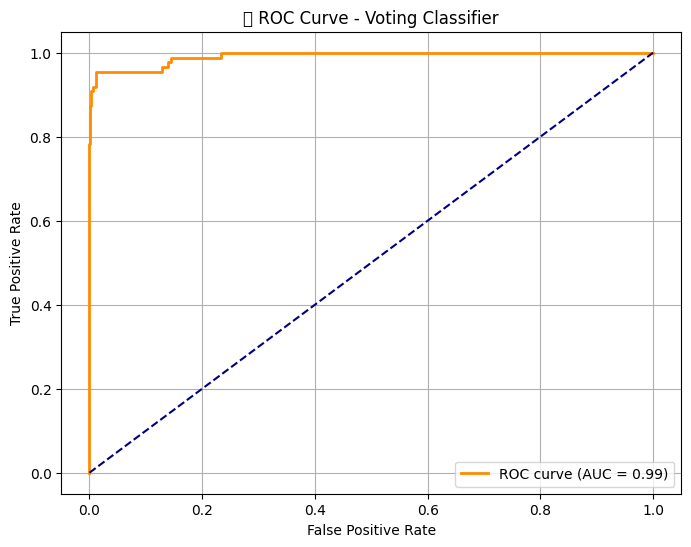

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class = 1)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔍 ROC Curve - Voting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [21]:
# Example setup (use your tuned models if available)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Create base classifiers
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Fit on resampled data (from previous step)
voting_clf.fit(X_train_res, y_train_res)


c:\Users\Minfy.DESKTOP-81ME0ME\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [25]:
import joblib

# Save the trained voting classifier model
joblib.dump(voting_clf, 'voting_classifier_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Save the feature columns after one-hot encoding
joblib.dump(X.columns.tolist(), 'columns.pkl')

print("✅ Model, scaler, and column names saved as .pkl files.")


✅ Model, scaler, and column names saved as .pkl files.
